In [1]:
import cvxpy as cp
import numpy as np

$$
f(n) = f(n - 1) + f(n - 2)

In [2]:
v = np.array([540, 200, 180, 350, 280, 450])
w = np.array([8, 3, 4, 5, 3, 6])
W = 20
x = cp.Variable(6, integer=True)
obj = cp.Maximize(v @ x)
con = [w @ x <= W, x >= 0, x <= 1]
prob = cp.Problem(obj, con)
prob.solve(solver=cp.COPT)
print(f"优化结果：{prob.value}")
print(f"参数取值：{x.value}")

优化结果：1470.0
参数取值：[ 1.  1. -0. -0.  1.  1.]


In [3]:
v = np.array([540, 200, 180, 350, 280, 450])
w = np.array([8, 3, 4, 5, 3, 6])
W = 20

dp = np.zeros((len(v) + 1, W + 1))
# 第 i 个物品
for i in range(1, len(v) + 1):
    # j 背包当前容量
    for j in range(1, W + 1):
        # 当前的物品大于背包剩余容量
        if w[i - 1] > j:
            # 不记录在内
            dp[i, j] = dp[i, j - 1]
        else:
            # 取两者之间最大的
            dp[i, j] = max(dp[i - 1, j], dp[i - 1, j - w[i - 1]] + v[i - 1])

print(f"优化结果：{dp[-1, -1]}")

优化结果：1470.0


# 动态规划

In [4]:
m = 5  # 　 投资总额
n = 6
k = 4  # 　 项目数
# m 元钱，n 项投资，k 个项目
dp = np.zeros((m, n))  # dp[i][j] 从第 1 - i 号项目中选择，投资 j 万元，所取得的最大收益
# 从 1 - i 号项目中选择，投资 j 万元，获得最大收益时，在第 i 号项目中投资了多少钱
mark = np.zeros((m, n))
f = np.array(
    [
        [0, 0, 0, 0, 0, 0],
        [0, 11, 12, 13, 14, 15],
        [0, 0, 5, 10, 15, 20],
        [0, 2, 10, 30, 32, 40],
        [0, 20, 21, 22, 23, 24],
    ]
)

# 初始化第一行
for j in range(m + 1):
    dp[1, j] = f[1, j]
    mark[1, j] = j
for i in range(1, k + 1):
    for j in range(1, m + 1):
        for k in range(j):
            if dp[i, j] < f[i, j] + dp[i - 1, j - k]:
                dp[i, j] = f[i, k] + dp[i - 1, j - k]
                mark[i, j] = k
print("最大收益", dp[4, 5])

for i in range(1, k + 1):
    for j in range(m + 1):
        print(f"({dp[i, j]}, {mark[i, j]})", end="\t")
    print("\n")

for i in range(k, 0, -1):
    print(f"第{i}个项目投资{mark[i, m]}元")
    m = m - int(mark[i, m])

最大收益 61.0
(0.0, 0.0)	(11.0, 1.0)	(12.0, 2.0)	(13.0, 3.0)	(14.0, 4.0)	(15.0, 5.0)	

(0.0, 0.0)	(11.0, 0.0)	(11.0, 1.0)	(16.0, 2.0)	(21.0, 3.0)	(26.0, 4.0)	

(0.0, 0.0)	(11.0, 0.0)	(13.0, 1.0)	(21.0, 2.0)	(41.0, 3.0)	(43.0, 4.0)	

(0.0, 0.0)	(11.0, 0.0)	(31.0, 1.0)	(33.0, 1.0)	(41.0, 1.0)	(61.0, 1.0)	

第4个项目投资1.0元
第3个项目投资3.0元
第2个项目投资0.0元
第1个项目投资1.0元


![](https://leafalice-image.oss-cn-hangzhou.aliyuncs.com/img/2024-04-06%2F405230fc5c8fc357c9a9b87434b37b44--f14b--image-20240406125321305.png)

In [7]:
print("\n===--- 1. 线性加权法 ---===\n")
c1 = np.array([-2, -3])
c2 = np.array([1, 2])
A = np.array([[0.5, 0.25], [0.2, 0.2], [1, 5], [-1, -1]])
b = np.array([8, 4, 72, -10])
x = cp.Variable(2, pos=True)


obj = cp.Minimize(0.5 * (c1 + c2) @ x)
con = [A @ x <= b]

prob = cp.Problem(obj, con)
prob.solve(solver="COPT")
print(f"优化结果：\n{-c1 @ x.value}\n{c2 @ x.value}")
print(f"参数取值：{x.value}")

print("\n===--- 2. 理性点法 ---===\n")
c1 = np.array([2, 3])

obj1 = cp.Maximize(c1 @ x)
obj2 = cp.Minimize(c2 @ x)
prob1 = cp.Problem(obj1, con)
prob2 = cp.Problem(obj2, con)

prob1.solve()
prob2.solve()

v1 = prob1.value
v2 = prob2.value

obj3 = cp.Minimize((c1 @ x - v1) ** 2 + (c2 @ x - v2) ** 2)
prob3 = cp.Problem(obj3, con)
prob3.solve(solver="COPT")
print(f"优化结果：\n{c1 @ x.value}\n{c2 @ x.value}")
print(f"参数取值：{x.value}")

print("\n===--- 3. 序贯法 ---===\n")
con.append(c1 @ x == v1)
prob4 = cp.Problem(obj2, con)
prob4.solve(solver="COPT")
print(f"优化结果：\n{c1 @ x.value}\n{c2 @ x.value}")
print(f"参数取值：{x.value}")


===--- 1. 线性加权法 ---===

优化结果：
48.0
28.0
参数取值：[12.  8.]

===--- 2. 理性点法 ---===

优化结果：
42.559999996983976
23.91999999773776
参数取值：[13.36  5.28]

===--- 3. 序贯法 ---===

优化结果：
52.99999998236849
32.99999998236849
参数取值：[ 7.00000002 12.99999998]


[-8.94069698e-08  2.68220909e-07]
[0.]


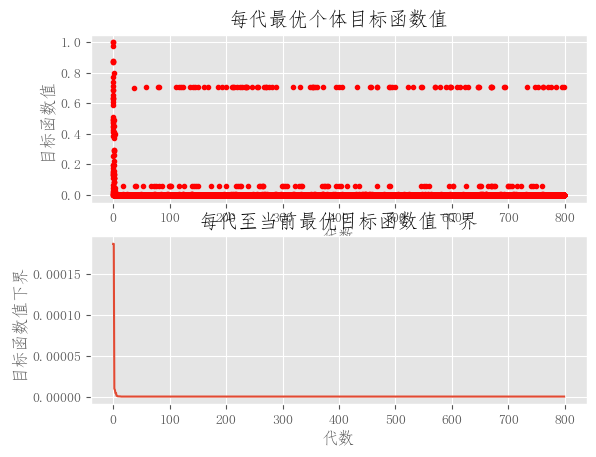

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sko.GA import GA, GA_TSP

plt.rcParams["font.sans-serif"] = ["FangSong"]
plt.rcParams["axes.unicode_minus"] = False
plt.style.use("ggplot")


def schaffer(p):
    """
    Schaffer 函数，用于测试优化算法性能。

    参数:
        p (tuple): 二维向量，包含两个元素 (x1, x2)。

    返回:
        float: Schaffer 函数在给定点 p 处的值。
    """
    x1, x2 = p
    x = np.square(x1) + np.square(x2)
    return 0.5 + (np.square(np.sin(x)) - 0.5) / np.square(1 + 0.001 * x)


ga = GA(
    func=schaffer,
    n_dim=2,
    size_pop=50,
    max_iter=800,
    prob_mut=0.001,
    lb=[-1, -1],
    ub=[1, 1],
    precision=1e-7,
)
best_x, best_y = ga.run()
print(best_x)
print(best_y)

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(Y_history.index, Y_history.values, ".", color="red")
ax[0].set_title("每代最优个体目标函数值")
ax[0].set_xlabel("代数")
ax[0].set_ylabel("目标函数值")

Y_history.min(axis=1).cummin().plot(kind="line", ax=ax[1])
ax[1].set_title("每代至当前最优目标函数值下界")
ax[1].set_xlabel("代数")
ax[1].set_ylabel("目标函数值下界")

plt.show()

In [32]:
from scipy import spatial

# 　 代表点的个数
num_points = 50

# 随机生成点的坐标
points_coordinate = np.random.rand(num_points, 2)
# 求得一个欧式距离矩阵
distance_matrix = spatial.distance.cdist(
    points_coordinate, points_coordinate, metric="euclidean"
)


# routine 表示旅行顺序
def cal_total_distance(routine):
    # 计算点的数量
    (num_points,) = routine.shape
    # 计算相邻两个点之间的距离，最后求和
    # routine 代表两个点之间可通
    return sum(
        [
            distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]]
            for i in range(num_points)
        ]
    )


# 调包
ga_tsp = GA_TSP(
    func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1
)

# 最佳点和和最佳距离
best_points, best_distance = ga_tsp.run()

fig, ax = plt.subplots(1, 2)
# 根据索引返回相应的坐标值
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], "o-")
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()

NameError: name 'GA_TSP' is not defined

c:\Users\31866\AppData\Local\Programs\Python\Python312\Lib\site-packages\sko\PSO.py:12: SyntaxWarning: invalid escape sequence '\h'
  """


优化结果：0.25
参数取值：[0.   0.05 0.5 ]


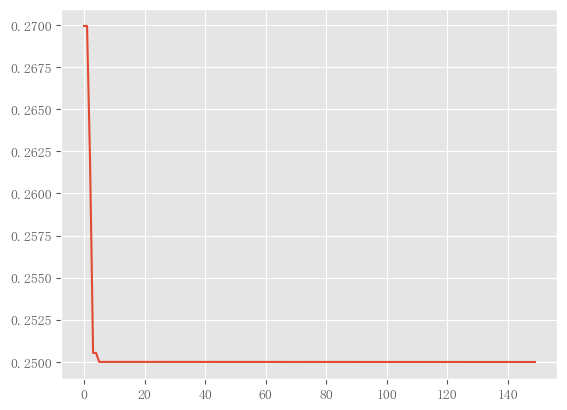

In [10]:
from sko.PSO import PSO


def demo_func(x):
    return x[0] ** 2 + (x[1] - 0.05) ** 2 + x[2] ** 2


pso = PSO(
    func=demo_func,
    dim=3,
    pop=40,
    max_iter=150,
    lb=[0, -1, 0.5],
    ub=[1, 1, 1],
    w=0.8,
    c1=0.5,
    c2=0.5,
)
pso.run()
print(f"优化结果：{pso.gbest_y}")
print(f"参数取值：{pso.gbest_x}")

plt.plot(pso.gbest_y_hist)
plt.show()

[[-4.   -3.99 -3.98 ...  3.97  3.98  3.99]
 [-4.   -3.99 -3.98 ...  3.97  3.98  3.99]
 [-4.   -3.99 -3.98 ...  3.97  3.98  3.99]
 ...
 [-4.   -3.99 -3.98 ...  3.97  3.98  3.99]
 [-4.   -3.99 -3.98 ...  3.97  3.98  3.99]
 [-4.   -3.99 -3.98 ...  3.97  3.98  3.99]]
[[-4.   -4.   -4.   ... -4.   -4.   -4.  ]
 [-3.99 -3.99 -3.99 ... -3.99 -3.99 -3.99]
 [-3.98 -3.98 -3.98 ... -3.98 -3.98 -3.98]
 ...
 [ 3.97  3.97  3.97 ...  3.97  3.97  3.97]
 [ 3.98  3.98  3.98 ...  3.98  3.98  3.98]
 [ 3.99  3.99  3.99 ...  3.99  3.99  3.99]]


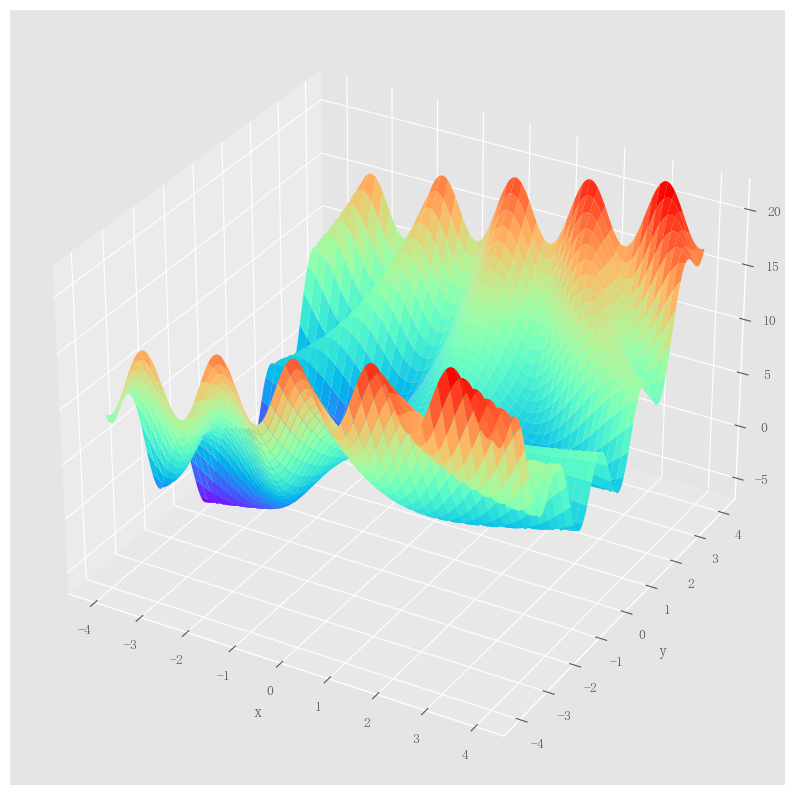

In [10]:
X = np.arange(-4, 4, 0.01)
Y = np.arange(-4, 4, 0.01)
x, y = np.meshgrid(X, Y)
print(x)
print(y)
Z = 3 * np.cos(x * y) + x + y**2

fig = plt.figure(figsize=(10, 15))
ax = plt.subplot(projection="3d")
ax.plot_surface(x, y, Z, cmap="rainbow")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

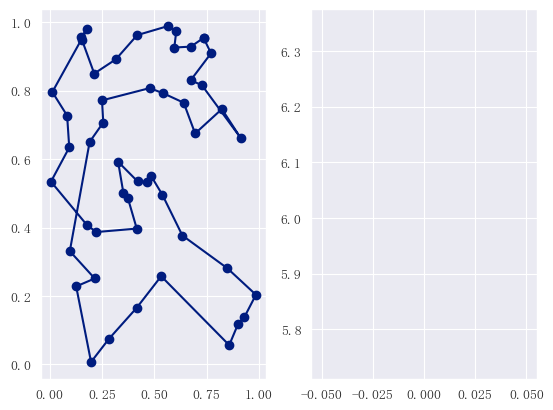

In [31]:
from scipy import spatial
import numpy as np
import seaborn as sns
from sko.ACA import ACA_TSP
import matplotlib.pyplot as plt


sns.set_style("darkgrid")
sns.set_palette("dark")

plt.rcParams["font.sans-serif"] = ["FangSong"]
plt.rcParams["axes.unicode_minus"] = False

# 　 代表点的个数
num_points = 50

# 随机生成点的坐标
points_coordinate = np.random.rand(num_points, 2)
# 求得一个欧式距离矩阵
distance_matrix = spatial.distance.cdist(
    points_coordinate, points_coordinate, metric="euclidean"
)


# routine 表示旅行顺序
def cal_total_distance(routine):
    # 计算点的数量
    (num_points,) = routine.shape
    # 计算相邻两个点之间的距离，最后求和
    # routine 代表两个点之间可通
    return sum(
        [
            distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]]
            for i in range(num_points)
        ]
    )


# 调包
aca_tsp = ACA_TSP(
    func=cal_total_distance,
    n_dim=num_points,
    size_pop=50,
    max_iter=100,
    distance_matrix=distance_matrix,
)

# 最佳点和和最佳距离
best_points, best_distance = aca_tsp.run()

fig, ax = plt.subplots(1, 2)
# 根据索引返回相应的坐标值
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], "o-")
ax[1].plot(aca_tsp.y_best_history)
plt.show()

In [11]:
# 使用遗传算法
from sko.GA import GA


def func(x):
    return (
        4
        + 0.3 * x[0]
        + 0.0007 * x[0] ** 2
        + 3
        + 0.32 * x[1]
        + 0.0004 * x[1] ** 2
        + 3.5
        + 0.3 * x[2]
        + 0.00045 * x[2] ** 2
    )


def constraint_eq():
    return lambda x: [x[0] + x[1] + x[2] - 700]


constraint_eq = constraint_eq()

ga = GA(
    func=func,  # 目标函数
    n_dim=3,  # 变量维度，就是变量有几个
    size_pop=200,  # 种群数量
    max_iter=1000,  # 最大迭代次数
    lb=[100, 120, 150],  # 变量下限
    ub=[200, 250, 300],  # 变量上限
    constraint_eq=[constraint_eq],  # 等式条件
)

best_x, best_y = ga.run()  # 最优的解
print("best_x: ", best_x)
print("best_y: ", best_y)

best_x:  [179.07225329 235.75705395 285.17069276]
best_y:  [306.48955261]


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import model_selection

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 创建并训练决策树模型
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# 评估模型
y_pred = tree_clf.predict(X_test)
print(tree_clf.score(X_test, y_test))  # 输出模型准确度

1.0
